# Build heatmaps for Trent and Robertson

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from mplsoccer.pitch import Pitch
import seaborn as sns

In [2]:
import statsbombpy

In [3]:
from statsbombpy import sb

In [4]:
sb.competitions()

credentials were not supplied. open data access only


,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-10-25T12:33:27.855343,2020-10-25T12:33:27.855343
1,16,1,Europe,Champions League,male,2017/2018,2021-01-23T21:55:30.425330,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


## Retrieve data for the UCL Final won by Liverpool

In [5]:
events = sb.events(match_id=22912)

credentials were not supplied. open data access only


In [6]:
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Tottenham Hotspur,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Liverpool,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Tottenham Hotspur,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Liverpool,00:00:00.000,Half Start,NaN


## Filter the columns 

In [7]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_offensive', 'foul_committed_penalty',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected

In [8]:
events = events[['team','type','player','minute', 'location', 'pass_end_location']].reset_index()

In [9]:
events = events[events['team']=="Liverpool"]

In [10]:
events

,index,team,type,player,minute,location,pass_end_location
1,1,Liverpool,Starting XI,NaN,0,NaN,NaN
2,2,Liverpool,Half Start,NaN,0,NaN,NaN
4,4,Liverpool,Half Start,NaN,45,NaN,NaN
6,6,Liverpool,Pass,Jordan Brian Henderson,0,"[61.0, 41.0]","[34.9, 44.7]"
7,7,Liverpool,Pass,Joël Andre Job Matip,0,"[37.0, 44.9]","[87.5, 4.4]"
...,...,...,...,...,...,...,...
3154,3154,Liverpool,Substitution,Roberto Firmino Barbosa de Oliveira,57,NaN,NaN
3155,3155,Liverpool,Substitution,Georginio Wijnaldum,61,NaN,NaN
3159,3159,Liverpool,Substitution,Sadio Mané,88,NaN,NaN
3161,3161,Liverpool,Tactical Shift,NaN,77,NaN,NaN


In [11]:
events['player'].unique()

array([nan, 'Jordan Brian Henderson', 'Joël Andre Job Matip',
       'Fábio Henrique Tavares', 'Virgil van Dijk', 'Georginio Wijnaldum',
       'Sadio Mané', 'Andrew Robertson', 'Trent Alexander-Arnold',
       'Mohamed Salah', 'Alisson Ramsés Becker',
       'Roberto Firmino Barbosa de Oliveira', 'James Philip Milner',
       'Divock Okoth Origi', 'Joe Gomez'], dtype=object)

In [12]:
events['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Pressure', 'Foul Committed', 'Shot', 'Goal Keeper',
       'Clearance', 'Ball Recovery', 'Foul Won', 'Interception',
       'Miscontrol', 'Dispossessed', 'Dribbled Past', 'Dribble', '50/50',
       'Block', 'Shield', 'Injury Stoppage', 'Referee Ball-Drop',
       'Half End', 'Substitution', 'Tactical Shift'], dtype=object)

## Retrieve Trent Alexander-Arnold data

In [13]:
taa_pass_data = events[events['player']=="Trent Alexander-Arnold"]

In [14]:
taa_pass_data = taa_pass_data[taa_pass_data['type'] == "Pass"].reset_index()

In [15]:
taa_pass_data[['x','y']] = taa_pass_data.location.to_list()

In [16]:
taa_pass_data[['endX', 'endY']] = taa_pass_data.pass_end_location.to_list()

### Plot a pass map 

C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


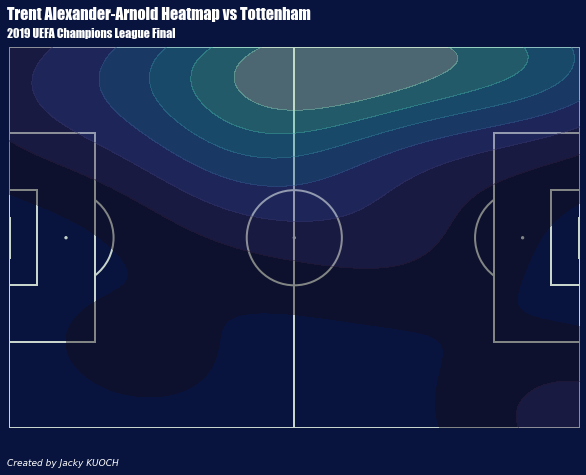

<Figure size 432x288 with 0 Axes>

In [17]:
fig ,ax = plt.subplots(figsize=(11,7))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.9, "Trent Alexander-Arnold Heatmap vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.9, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.05, "Created by Jacky KUOCH",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(10.5, 7),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the figure
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

# Create the heatmap
kde = sns.kdeplot(
    taa_pass_data['x'],
    taa_pass_data['y'],
    shade=True,
    shade_lowest=False,
    alpha = 0.4,
    n_levels = 8,
    cmap="mako"
)

# Plot the passes
#for x in range(len(taa_pass_data['x'])):
    #plt.plot((taa_pass_data['x'][x],taa_pass_data['endX'][x]),(taa_pass_data['y'][x],taa_pass_data['endY'][x]),color='#2bb6e0')
    #plt.scatter(taa_pass_data['x'][x],taa_pass_data['y'][x],color='#2bb6e0') 

#Set limits for our plot
plt.xlim(0,120)
plt.ylim(0,80)

plt.show()
plt.tight_layout()

## Do the same for Robertson

In [18]:
robertson_pass_data = events[events['player']=="Andrew Robertson"]

In [19]:
robertson_pass_data = robertson_pass_data[robertson_pass_data['type'] == "Pass"].reset_index()

In [20]:
robertson_pass_data[['x','y']] = robertson_pass_data.location.to_list()

In [21]:
robertson_pass_data[['endX', 'endY']] = robertson_pass_data.pass_end_location.to_list()

C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


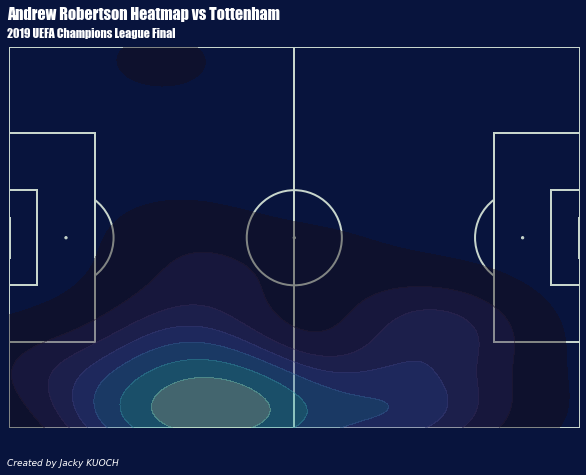

<Figure size 432x288 with 0 Axes>

In [40]:
fig ,ax = plt.subplots(figsize=(11,7))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.9, "Andrew Robertson Heatmap vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.9, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.05, "Created by Jacky KUOCH",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(10.5, 7),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the figure
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

# Create the heatmap
kde = sns.kdeplot(
    robertson_pass_data['x'],
    robertson_pass_data['y'],
    shade=True,
    shade_lowest=False,
    alpha = 0.4,
    n_levels = 8,
    cmap="mako"
)

# Plot the passes
#for x in range(len(taa_pass_data['x'])):
    #plt.plot((taa_pass_data['x'][x],taa_pass_data['endX'][x]),(taa_pass_data['y'][x],taa_pass_data['endY'][x]),color='#2bb6e0')
    #plt.scatter(taa_pass_data['x'][x],taa_pass_data['y'][x],color='#2bb6e0') 

#Set limits for our plot
plt.xlim(0,120)
plt.ylim(0,80)

plt.show()
plt.tight_layout()

## Plot Vertical heatmap

C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


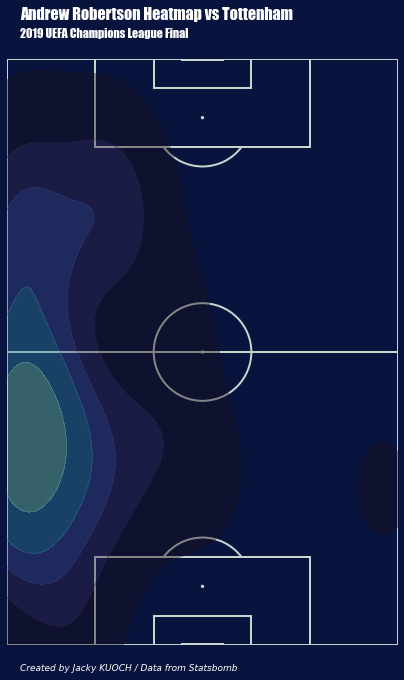

<Figure size 432x288 with 0 Axes>

In [44]:
fig ,ax = plt.subplots(figsize=(7,11))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.9, "Andrew Robertson Heatmap vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.9, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.1, "Created by Jacky KUOCH / Data from Statsbomb",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(7, 10.5),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    robertson_pass_data['y'],
    robertson_pass_data['x'],
    shade=True,
    shade_lowest=False,
    alpha = 0.4,
    n_levels = 6,
    cmap="mako"
)

#Set limits for our plot
plt.xlim(0,80)
plt.ylim(0,120)

plt.show()
plt.tight_layout()

C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jacky\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


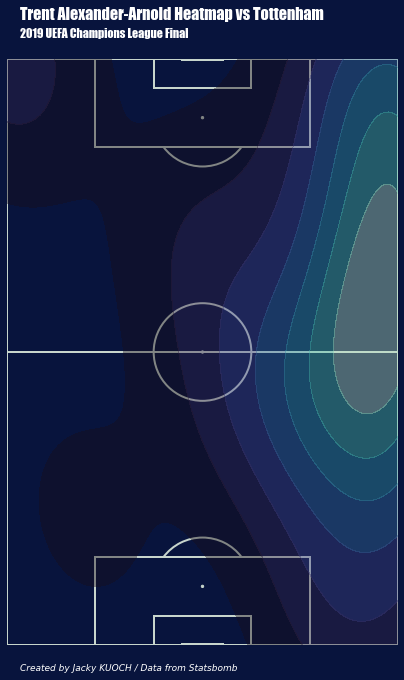

<Figure size 432x288 with 0 Axes>

In [43]:
fig ,ax = plt.subplots(figsize=(7,11))
hfont = {'fontname':'Impact'}

#Set title
fig.text(0.15,0.9, "Trent Alexander-Arnold Heatmap vs Tottenham\n", fontsize = 16, fontweight = "bold", color = "w", **hfont)
fig.text(0.15,0.9, "2019 UEFA Champions League Final", fontsize = 12, fontweight="regular", color = "w", **hfont)
fig.text(0.15, 0.1, "Created by Jacky KUOCH / Data from Statsbomb",fontstyle="italic",fontsize=9, color="w")

#Change the background color
fig.set_facecolor('#08143D')
ax.patch.set_facecolor('#08143D')

#Parameters of the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='#08143D', line_color='#c7d5cc', figsize=(7, 10.5),
              constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    taa_pass_data['y'],
    taa_pass_data['x'],
    shade=True,
    shade_lowest=False,
    alpha = 0.4,
    n_levels = 8,
    cmap="mako"
)

#Set limits for our plot
plt.xlim(0,80)
plt.ylim(0,120)

plt.show()
plt.tight_layout()